In [114]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib inline
import jellyfish

In [115]:
df = pd.read_csv('C:\GIT\Amlin\\final_data.csv')

In [116]:
df.dtypes

Day                          int64
Month                       object
Year                       float64
Company                     object
City                        object
State                       object
Type of breach              object
Type of organization        object
Records Breached            object
Total Records              float64
Description of incident     object
dtype: object

In [117]:
df = df.dropna(axis=0)
df.isnull().any()

Day                        False
Month                      False
Year                       False
Company                    False
City                       False
State                      False
Type of breach             False
Type of organization       False
Records Breached           False
Total Records              False
Description of incident    False
dtype: bool

In [118]:
df['Year'] = df['Year'].astype('int64')
df['Total Records'] = df['Total Records'].astype('int64')

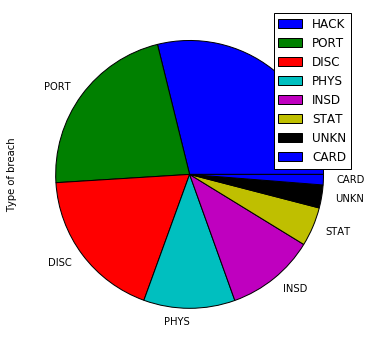

In [119]:
breaches = df['Type of breach'].value_counts()
breaches = breaches.to_frame()
breaches.plot.pie(y='Type of breach', figsize=[6, 6])

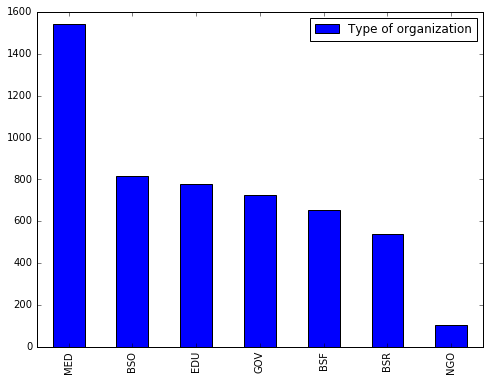

In [120]:
OrgTypes = df['Type of organization'].value_counts()
OrgTypes = OrgTypes.to_frame()
OrgTypes.plot.bar(y='Type of organization', figsize=[8,6])

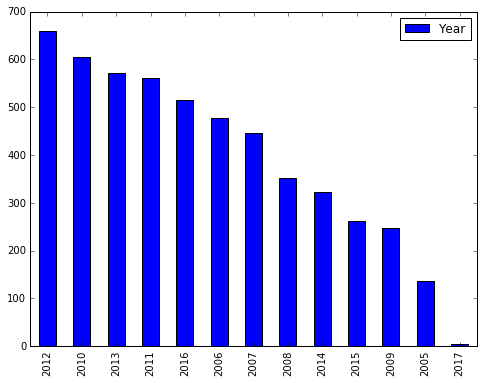

In [121]:
years = df['Year'].value_counts()
years = years.to_frame()
years.plot(kind='bar', figsize=[8,6])

In [122]:
df1 = df[['State', 'Type of organization', 'Type of breach', 'Records Breached']]
df1['State'] = df['State'].str.strip()

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [123]:
df1['Organization Severity'] = df1['Type of organization'].map({'BSF': 5, 'BSO': 7, 'BSR': 3, 'EDU': 7, 'GOV':5, 'MED': 8, 'NGO': 1})
df1['Breach Severity'] = df1['Type of breach'].map({'CARD': 4, 'DISC': 2, 'HACK': 9, 'INSD': 2, 'PHYS': 3, 'PORT': 3, 'STAT': 7, 'UNKN': 1})

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [124]:
df1['Location Risk'] = 2

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [125]:
df1.loc[df1['State'] == 'California','Location Risk' ] =9
df1.loc[df1['State'] == 'New York','Location Risk' ] =9
df1.loc[df1['State'] == 'Georgia','Location Risk' ] =9
df1.loc[df1['State'] == 'Arizona','Location Risk' ] =9
df1.loc[df1['State'] == 'Massachusetts','Location Risk' ] =9
df1.loc[df1['State'] == 'Distrcit Of Columbia','Location Risk' ] =9
df1.loc[df1['State'] == 'Colorado','Location Risk' ] =5
df1.loc[df1['State'] == 'Connecticut','Location Risk' ] =5
df1.loc[df1['State'] == 'Missouri','Location Risk' ] =5
df1.loc[df1['State'] == 'Ohio','Location Risk' ] =5
df1.loc[df1['State'] == 'Texas','Location Risk' ] =5
df1.loc[df1['State'] == 'Virginia','Location Risk' ] =5
df1.loc[df1['State'] == 'Illinois','Location Risk' ] =5
df1.loc[df1['State'] == 'North Carolina','Location Risk' ] =5
df1.loc[df1['State'] == 'New Jersey','Location Risk' ] =5

In [126]:
df1.head()

,State,Type of organization,Type of breach,Records Breached,Organization Severity,Breach Severity,Location Risk
0,Kentucky,EDU,DISC,676,7,2,2
1,Tennessee,EDU,PORT,14783,7,3,2
2,Florida,MED,PORT,33000,8,3,2
3,New York,EDU,DISC,300,7,2,9
4,Colorado,MED,PHYS,175,8,3,5


In [127]:
risk = df1[['State', 'Location Risk']]

In [128]:
from sklearn import preprocessing

for f in df1.columns:
    if df1[f].dtype == 'object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df1[f].values))
        df1[f] = lbl.transform(list(df1[f].values))

State
Type of organization
Type of breach
Records Breached


C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [129]:
df1.head()

,State,Type of organization,Type of breach,Records Breached,Organization Severity,Breach Severity,Location Risk
0,17,3,1,1601,7,2,2
1,42,3,5,387,7,3,2
2,9,5,5,1023,8,3,2
3,32,3,1,946,7,2,9
4,5,5,4,513,8,3,5


In [130]:
df1['Type of organization'].replace(to_replace=0, value=5, inplace=True) 
df1['Type of organization'].replace(to_replace=1, value=7, inplace=True)
df1['Type of organization'].replace(to_replace=2, value=3, inplace=True)
df1['Type of organization'].replace(to_replace=3, value=7, inplace=True)
df1['Type of organization'].replace(to_replace=4, value=5, inplace=True)
df1['Type of organization'].replace(to_replace=5, value=8, inplace=True)
df1['Type of organization'].replace(to_replace=6, value=1, inplace=True)
df1['Type of breach'].replace(to_replace=0, value=4, inplace=True)
df1['Type of breach'].replace(to_replace=1, value=2, inplace=True)
df1['Type of breach'].replace(to_replace=2, value=9, inplace=True)
df1['Type of breach'].replace(to_replace=3, value=2, inplace=True)
df1['Type of breach'].replace(to_replace=4, value=3, inplace=True)
df1['Type of breach'].replace(to_replace=5, value=3, inplace=True)
df1['Type of breach'].replace(to_replace=6, value=7, inplace=True)
df1['Type of breach'].replace(to_replace=7, value=1, inplace=True)

In [182]:
df1.loc[df1['Records Breached'] > 1399, 'Records Breached' ] =9
df1.loc[(df1['Records Breached'] > 846) & (df1['Records Breached'] <= 1398 ), 'Records Breached' ] =6
df1.loc[(df1['Records Breached'] > 0) & (df1['Records Breached'] <= 845 ), 'Records Breached' ] =3

In [183]:
df1.head()

,State,Type of organization,Type of breach,Records Breached,Location Risk,Risk Level,Threat Level
0,17,7,9,3,2,5.25,Medium
1,42,7,3,3,2,3.75,Medium
2,9,8,3,3,2,4.00,Medium
3,32,7,9,3,9,7.00,High
4,5,8,3,3,5,4.75,Medium


In [184]:
df1['Risk Level'] = (df1['Type of breach'] + df1['Type of organization'] + 
                      df1['Records Breached'] + df1['Location Risk'])/4

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [185]:
df1.head()

,State,Type of organization,Type of breach,Records Breached,Location Risk,Risk Level,Threat Level
0,17,7,9,3,2,5.25,Medium
1,42,7,3,3,2,3.75,Medium
2,9,8,3,3,2,4.00,Medium
3,32,7,9,3,9,7.00,High
4,5,8,3,3,5,4.75,Medium


In [186]:
print max(df1['Risk Level'])
print min(df1['Risk Level'])

353.0
1.75


In [201]:
df1['Threat Level'] = None
df1.loc[df1['Risk Level'] > 9, 'Threat Level'] = 'Very High'
df1.loc[df1['Risk Level'] <= 9, 'Threat Level'] = 'High'
df1.loc[df1['Risk Level'] <= 5.5, 'Threat Level'] = 'Medium'
df1.loc[df1['Risk Level'] <= 3, 'Threat Level'] = 'Low'

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [202]:
df1['Threat Level'].value_counts()

Medium       3285
High         1826
Low            47
Very High       2
Name: Threat Level, dtype: int64

In [188]:
features = df1[['State', 'Type of organization', 'Type of breach']]
labels = df1['Threat Level']

In [189]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels.astype(str))

In [190]:
print clf.predict([[32,7,9]])

['High']
